In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from plotter import StackHist
from utils import ResultSet

In [2]:
rs_TTZ  = ResultSet("TTZ",  "../data/TTZToLLNuNu_treeProducerSusyMultilepton_tree.root")
rs_TTW  = ResultSet("TTW",  "../data/TTWToLNu_treeProducerSusyMultilepton_tree.root")
rs_TTH = ResultSet("TTH", "../data/TTHnobb_mWCutfix_ext1_treeProducerSusyMultilepton_tree.root")
rs_TTTT = ResultSet("TTTT", "../data/TTTT_ext_treeProducerSusyMultilepton_tree.root")

Loading unchanged result file  ../data/TTZToLLNuNu_treeProducerSusyMultilepton_tree_result.root
Loading unchanged result file  ../data/TTWToLNu_treeProducerSusyMultilepton_tree_result.root
Loading unchanged result file  ../data/TTHnobb_mWCutfix_ext1_treeProducerSusyMultilepton_tree_result.root
Loading unchanged result file  ../data/TTTT_ext_treeProducerSusyMultilepton_tree_result.root


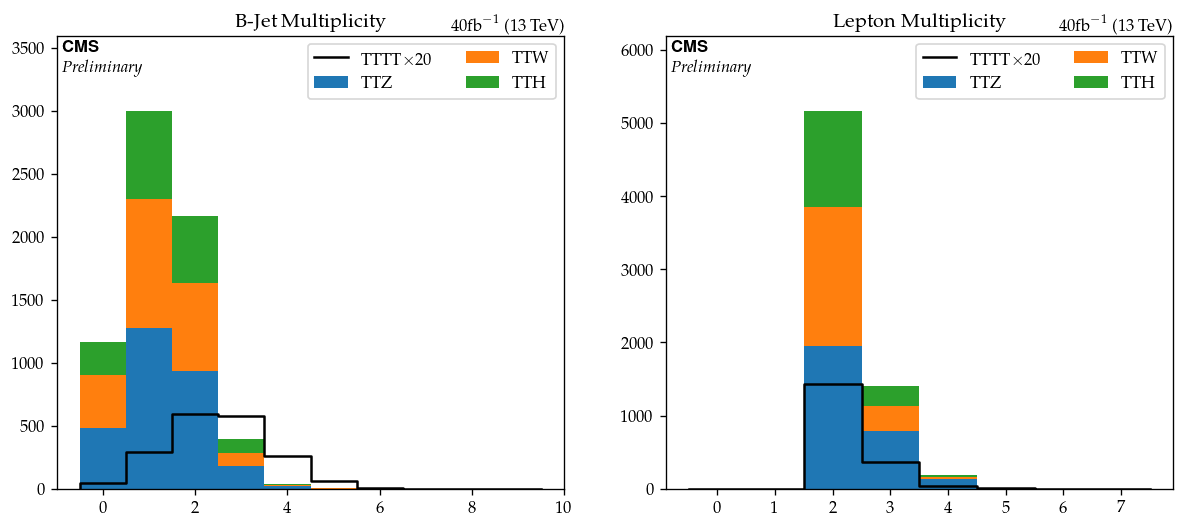

In [15]:
def stack(attr, ax, title, stack_signal=False):
    hs = StackHist(title)
    hs.add_mc_background(getattr(rs_TTZ,attr), 'TTZ', lumi=rs_TTZ.lumi)
    hs.add_mc_background(getattr(rs_TTW,attr), 'TTW', lumi=rs_TTW.lumi)
    hs.add_mc_background(getattr(rs_TTH,attr), 'TTH', lumi=rs_TTH.lumi)
    
    hs.set_mc_signal(getattr(rs_TTTT,attr), 'TTTT', lumi=rs_TTTT.lumi, stack=stack_signal, scale=20)
    
    hs.luminosity = 40
    hs.energy = 13
    hs.draw(ax)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,5))
stack('b_jet_count', ax0, 'B-Jet Multiplicity', )
stack('lepton_count', ax1, 'Lepton Multiplicity', )